In [4]:
import sys
import os
script_dir = os.path.abspath(os.path.join('..', '..', 'numpy', '1D'))
sys.path.append(script_dir)
from utils import *
from env import *
from model import *

In [5]:
data_dir = "/Users/mganeshkumar/Library/CloudStorage/OneDrive-HarvardUniversity/Code/online_pf_learning/online/1D/"

In [ ]:
total_trials = 50000
npc = 512
exptname = "./data/full_290924_cri_1D_td_online_0.0ns_012p_512n_0.01plr_0.01clr_0.0001llr_0.0001alr_0.0001slr_uni_0.5a_0.1s_2a_1s_50000e_5rmax_0.05rsz"
[logparams, latencys,cum_rewards, allcoords] = saveload(data_dir+exptname,1,"load")
[lambdas, sigmas, alphas, policies, values] = get_param_changes(logparams, total_trials, stable_perf=0)
N = logparams[0][2].shape[0]
scaling = 0.0001/0.01
downsamp = 200

[383, 409]


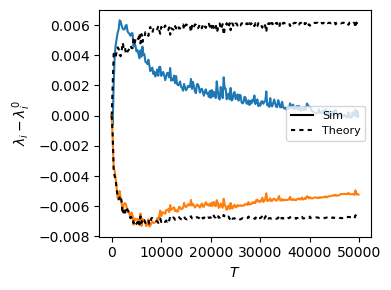

In [12]:
# theory vs simulation

s_0 = -0.75
sigma_x = 10  # 10
s_bar = 0.535 # 0.535

vector = np.linspace(-1, 1, N) 
target_values = [ 0.5, 0.6]  
top_indices = find_closest_indices(vector, target_values)
print(top_indices)

f,ax = plt.subplots(figsize=(4,3))

for i,idx in enumerate(top_indices):

    sim = (lambdas[:,idx] - lambdas[0,idx])

    lam_scale = 1/(2/sigmas[0,idx]**2 + 1/sigma_x**2)
    mu = ((lambdas[0,idx] + s_bar) / sigmas[0,idx]**2) + ((s_0) /sigma_x**2)
    theory = (values[:,idx,0]**2) * (lam_scale * mu - lambdas[0,idx]) #* alphas[0,idx]**2

    ax.plot(np.arange(total_trials)[::downsamp], (sim)[::downsamp])
    ax.plot(np.arange(total_trials)[::downsamp], (theory)[::downsamp], linestyle='--', dashes=(2,2),color='k',zorder=2)

ax.plot([],[],label='Sim',color='k')
ax.plot([],[], linestyle='--',label='Theory',color='k',dashes=(2,2))
ax.legend(fontsize=8, loc=5)
ax.set_ylabel(f'$\\lambda_{{i}} - \\lambda_{{i}}^0$')
ax.set_xlabel('$T$')
# ax2.set_ylabel('Theory')
f.tight_layout()
# f.savefig('./svgs/amp_lambda_512.svg')


[64, 256, 383, 409]


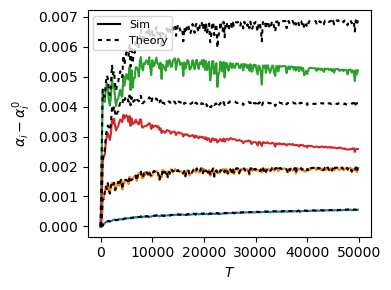

In [13]:
# theory vs simulation
target_values = [-0.75, 0.0, 0.5, 0.6]
top_indices = find_closest_indices(vector, target_values)
print(top_indices)

f,ax = plt.subplots(figsize=(4,3))

# ax2 = ax.twinx()
for i,idx in enumerate(top_indices):
    sim = (alphas[:,idx] - alphas[0,idx])

    theory =  values[:,idx,0]**2 * scaling * 2

    ax.plot(np.arange(total_trials)[::downsamp], sim[::downsamp], zorder=1)
    ax.plot(np.arange(total_trials)[::downsamp], theory[::downsamp], linestyle='--', dashes=(2,2),color='k',zorder=2)

ax.plot([],[],label='Sim',color='k')
ax.plot([],[], linestyle='--',label='Theory',color='k',dashes=(2,2))
ax.legend(fontsize=8, loc='upper left')
ax.set_ylabel(f'$\\alpha_{{i}} - \\alpha_{{i}}^0$')
ax.set_xlabel('$T$')
# ax2.set_ylabel('Theory')

f.tight_layout()
# f.savefig(f'./svgs/amp_theory_{npc}.svg')
